In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('diwalidata.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop null values
df.dropna(inplace=True)

In [9]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int32')

In [11]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [12]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


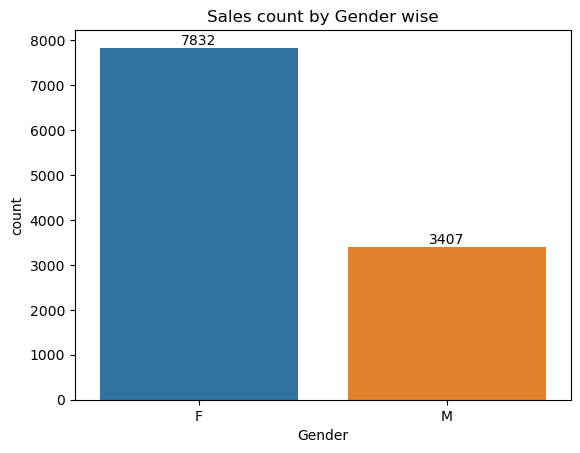

In [13]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)
plt.title("Sales count by Gender wise")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Sales amount by Gender wise'}, xlabel='Gender', ylabel='Amount'>

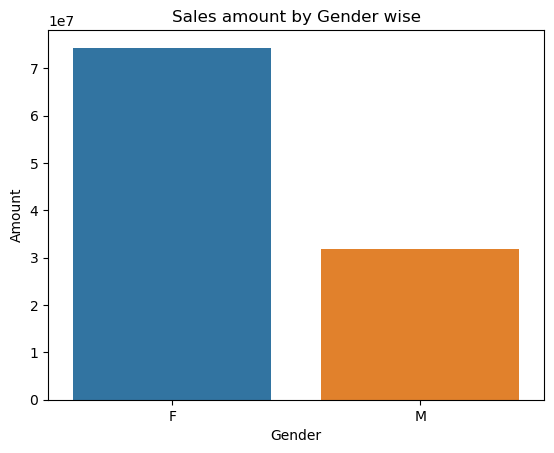

In [14]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Sales amount by Gender wise")

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

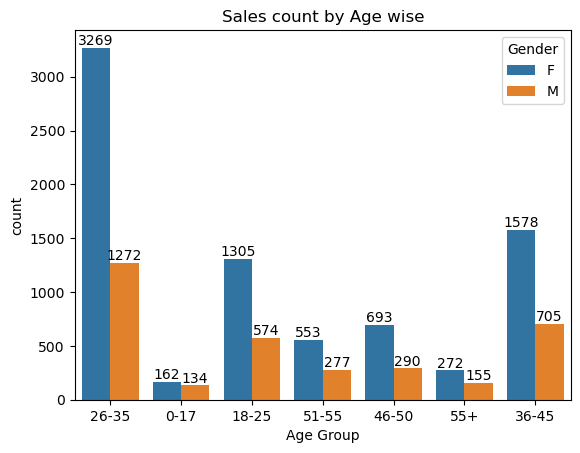

In [15]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
plt.title("Sales count by Age wise")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: title={'center': 'Sales Amount by Age wise'}, xlabel='Age Group', ylabel='Amount'>

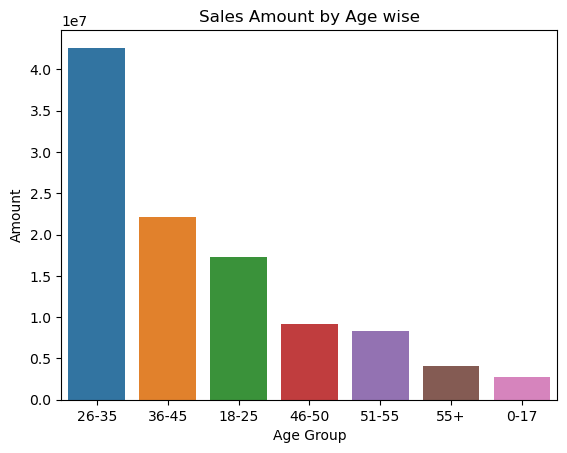

In [16]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Sales Amount by Age wise")

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

<Axes: title={'center': 'Top 10 sales amount by States'}, xlabel='State', ylabel='Amount'>

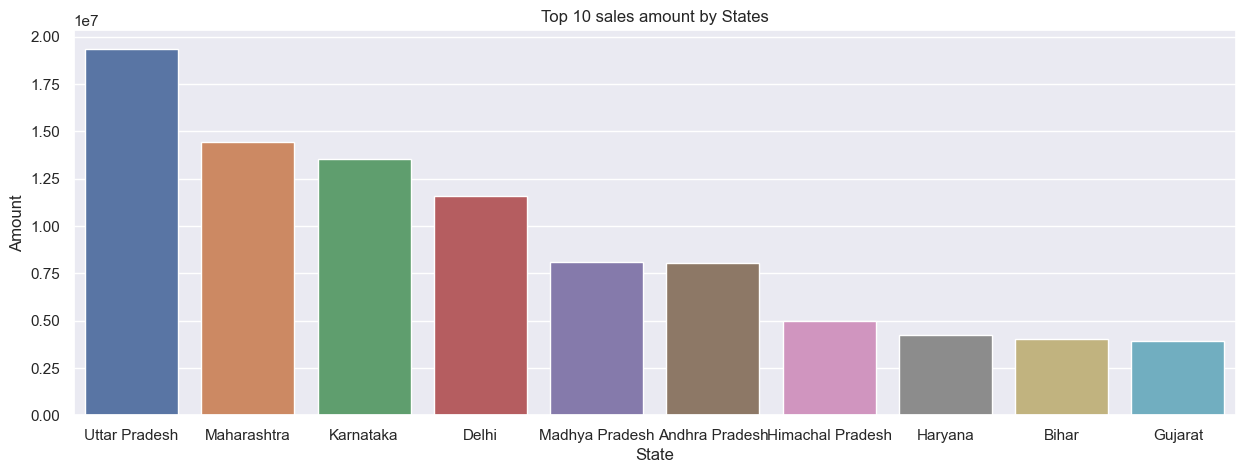

In [18]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title("Top 10 sales amount by States")

sns.set(rc={'figure.figsize':(15,9)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<Axes: title={'center': 'Sales Amount by Sector wise'}, xlabel='Occupation', ylabel='Amount'>

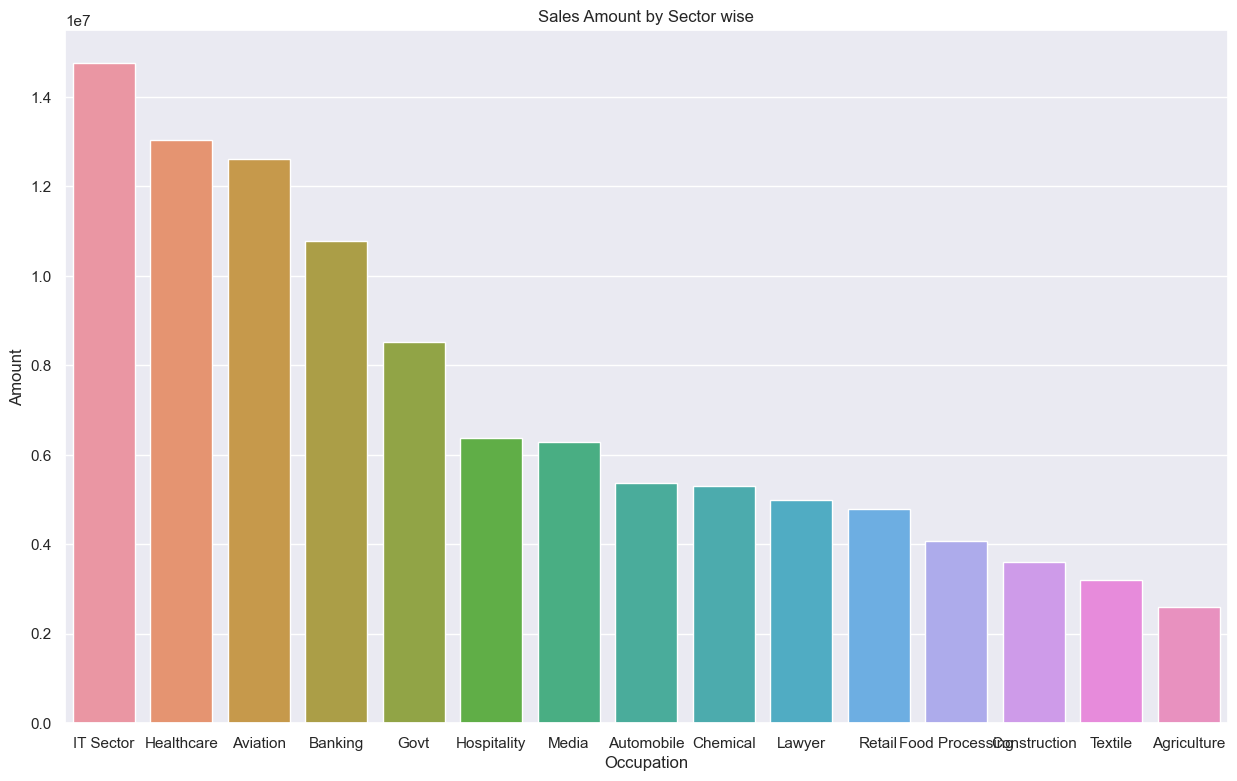

In [19]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.title("Sales Amount by Sector wise")

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

<Axes: title={'center': 'Sales Amount by product wise'}, xlabel='Product_Category', ylabel='Amount'>

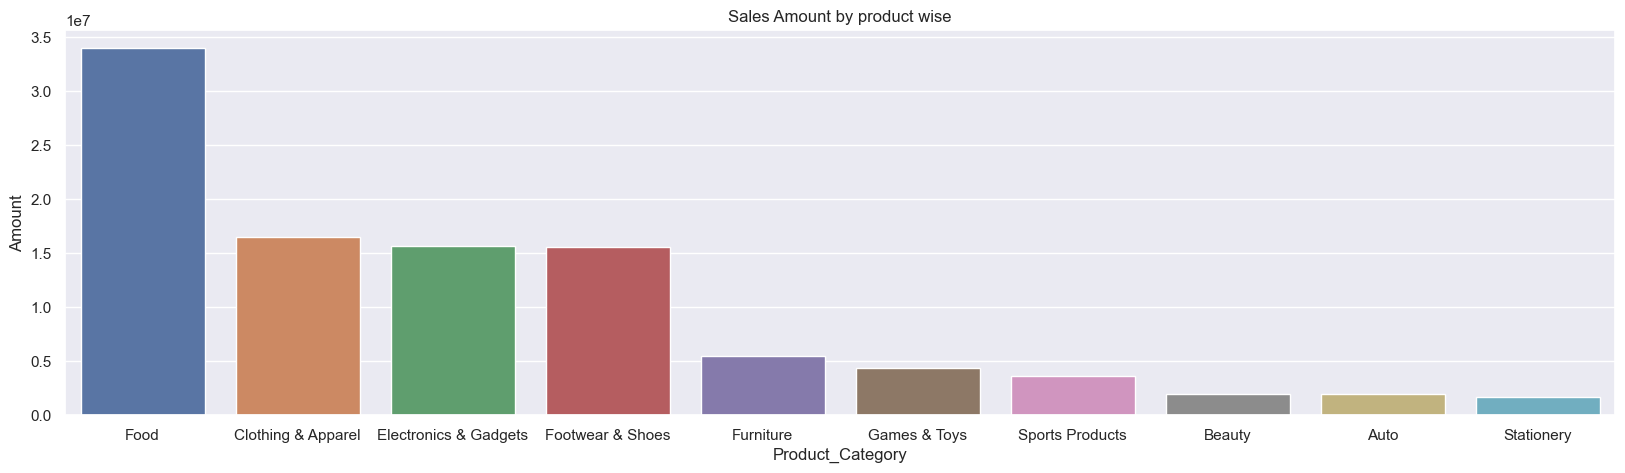

In [20]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.title("Sales Amount by product wise")
sns.set(rc={'figure.figsize':(20,9)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')